In [1]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import MinMaxScaler

# Load the data for "On" and "Off"
data_on = pd.read_csv('serial-output-allume2.csv')
data_off = pd.read_csv('serial-output-eteint2.csv')

# Label the data: 1 for "On", 0 for "Off"
data_on['Label'] = 1
data_off['Label'] = 0

print("Size of data_on:", data_on.shape)
print("Size of data_off:", data_off.shape)

# Combine the data into one DataFrame
data = pd.concat([data_on, data_off], ignore_index=True)

# Drop the first column
data = data.drop(columns=['Count'])

# Split features and labels
X = data.drop(columns=['Label'])
y = data['Label']

melColumns = ['Mel_1','Mel_2','Mel_3','Mel_4','Mel_5','Mel_6']

# Save the data to a CSV file
data.to_csv('data.csv', index=False)


Size of data_on: (81, 11)
Size of data_off: (80, 11)


In [2]:
# Normalize features to the range [0, 1] using MinMaxScaler
scaler = MinMaxScaler()
#X[melColumns] = scaler.fit_transform(X[melColumns])

In [3]:
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [9]:
# Initialize and train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate accuracy and display classification report
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)

print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      1.00      1.00        17

    accuracy                           1.00        33
   macro avg       1.00      1.00      1.00        33
weighted avg       1.00      1.00      1.00        33

Coefficients: [[-1.71528748e-04  1.59865366e-04 -4.56487447e-05  6.95402580e-05
   2.64418335e-05 -2.78749501e-04 -4.05218606e-11 -1.83194672e-10
  -7.28887183e-09]]
Intercept: [-4.96123615e-09]


In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report


# Initialize and train the neural network with 1 hidden layer containing 2 neurons
model = MLPClassifier(hidden_layer_sizes=(2,), max_iter=1000, random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate accuracy and display classification report
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)

Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      1.00      1.00        17

    accuracy                           1.00        33
   macro avg       1.00      1.00      1.00        33
weighted avg       1.00      1.00      1.00        33



/home/rick/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


In [6]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, classification_report

# Initialize and train the Random Forest model
model = RandomForestClassifier(n_estimators=1000, random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate accuracy and display classification report
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)

Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      1.00      1.00        17

    accuracy                           1.00        33
   macro avg       1.00      1.00      1.00        33
weighted avg       1.00      1.00      1.00        33



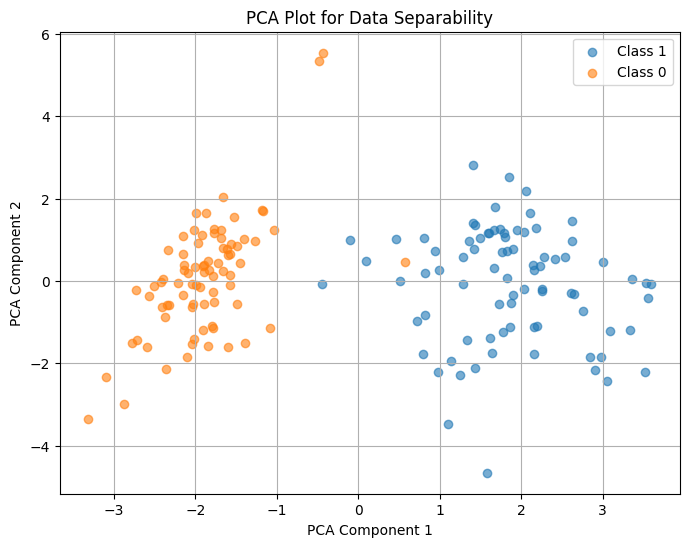

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform PCA to reduce to 2 dimensions
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Create a scatter plot
plt.figure(figsize=(8, 6))
for label in y.unique():
    plt.scatter(X_pca[y == label, 0], X_pca[y == label, 1], label=f'Class {label}', alpha=0.6)

plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('PCA Plot for Data Separability')
plt.legend()
plt.grid(True)
plt.show()